# Math question

Let us consider $L$ independent binary classifiers where the probability of a correct prediction is $p > 0.5$.   

The prediction of the aggregation of models follows a binomial distribution $B(L,p)$

For each classification problem, calculating the probability that k classifiers are correct out of the L classifiers amounts to :

-selcting $\dbinom{L}{k}$ classifiers

-applying the probability "weights" to each correct classifier : $p^{k}$ (independence)

-applying the probability "weights" to each incorrect classifier : $(1-p)^{L-k}$ (independence)

Thus our probability is $\dbinom{L}{k}p^{k}(1-p)^{L-k}$ , which is a Binomial distribution.

In [105]:
from scipy.stats import binom
L,p = 10,0.7
rv = binom(L,p)

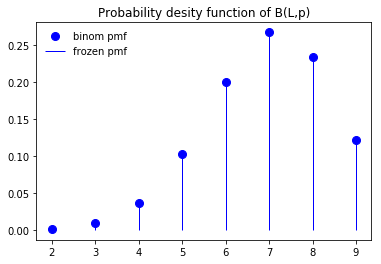

In [106]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.001, L, p),binom.ppf(0.999, L, p))
ax.vlines(x, 0, rv.pmf(x), colors='b', linestyles='-', lw=1,
label='frozen pmf')
ax.plot(x, binom.pmf(x, L, p), 'bo', ms=8, label='binom pmf')
ax.legend(loc='best', frameon=False)
plt.title("Probability desity function of B(L,p)")
plt.show()

The probability that the aggregation of models is correct is the probability that the random variable associated to the aggregation model is $<= \frac{L}{2}$

In [107]:
prob = rv.sf(5)#survival function
print("The probability of correct prediction is : "+str(prob))

The probability of correct prediction is : 0.8497316674


# BaggingTree Regression

We first use stumps aka trees of depth 1 (max_depth=1)

# 1&2 - Importance of Tree Depth in Bagging

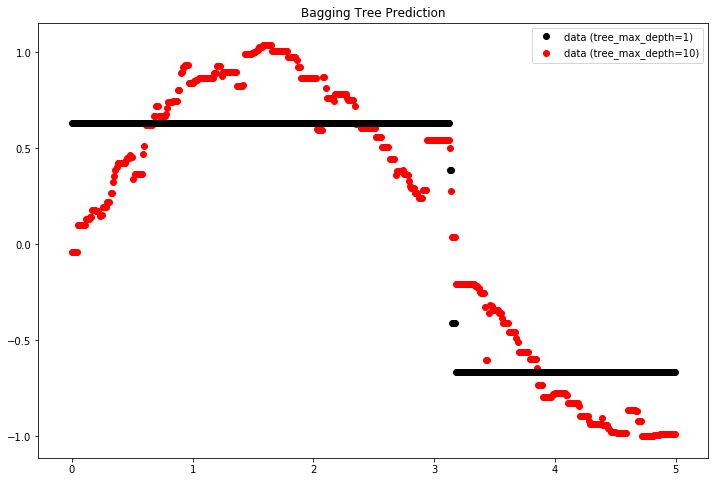

In [108]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor 
import matplotlib.pyplot as plt 
# Create a random dataset 
rng = np.random.RandomState(1) 
X = np.sort(5 * rng.rand(80, 1), axis=0) 
y = np.sin(X).ravel() 
y[::5] += 1 * (0.5 - rng.rand(16))

n_estimators = 10 # L in the text 
tree_max_depth = 1 
# TODO define the regressor by bagging stumps 
tree = DecisionTreeRegressor(max_depth=tree_max_depth) 
tree.fit(X, y) 
bagging = BaggingRegressor(base_estimator=tree,n_estimators=n_estimators) 
bagging.fit(X, y) 
# Predict 
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] 
y_tree = tree.predict(X_test) 
y_bagging = bagging.predict(X_test) 
# Plot the results 
plt.figure(figsize=(12, 8)) 
plt.plot(X_test, y_bagging, 'o', c="k", label="data (tree_max_depth=1)") 
# TODO add plots for Bagging/Tree 
plt.title("Bagging Tree Regression") 
plt.legend(loc=1, numpoints=1) 
#plt.show()


n_estimators = 10 # L in the text 
tree_max_depth = 10 
# TODO define the regressor by bagging stumps 
tree = DecisionTreeRegressor(max_depth=tree_max_depth) 
tree.fit(X, y) 
bagging = BaggingRegressor(base_estimator=tree,n_estimators=n_estimators) 
bagging.fit(X, y) 
# Predict 
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] 
y_tree = tree.predict(X_test) 
y_bagging = bagging.predict(X_test) 
# Plot the results 
plt.scatter(X_test, y_bagging, c="r", label="data (tree_max_depth=10)") 
# TODO add plots for Bagging/Tree 
plt.title("Bagging Tree Prediction") 
plt.legend(loc=1, numpoints=1) 
plt.show()


We observe that a bagging tree with depth 1 simply takes the average value over separate time intervals. Increasing the depth amounts to reducing the length of these intervals. The output of the tree with larger maximum depth is much closer to the initial dataset (without noise)

# 3 - Bias and Variance of Decision and Bagging Trees

In [109]:
y_test = np.sin(X_test).ravel() 
print('Decision Tree Bias : ' + str(np.mean(y_test - y_tree)))
print('True Variance : '+str(np.var(y_test)))
print('Bagging Variance : '+str(np.var(y_bagging)))

Decision Tree Bias : -0.004970827610027707
True Variance : 0.5054796778492734
Bagging Variance : 0.4965949948691884


The Decision Tree estimators are biased.


We observe that Bagging Estimators reduce the variance of the output.

# 4 - Noise and Overfitting

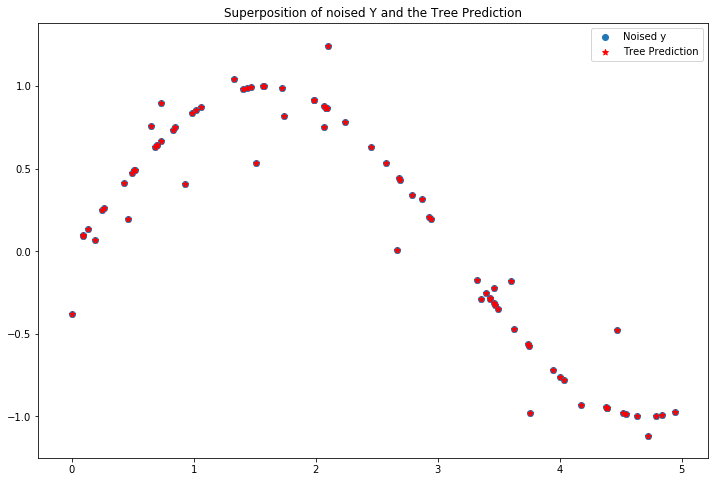

In [110]:
#We create a model with more noise
plt.figure(figsize=(12, 8)) 

rng = np.random.RandomState(1) 
X = np.sort(5 * rng.rand(80, 1), axis=0) 
y = np.sin(X).ravel() 
y[::4] += 1 * (0.5 - rng.rand(20))
plt.scatter(X,y,label = "Noised y")

tree = DecisionTreeRegressor(max_depth=15) 
tree.fit(X, y) 
y_tree = tree.predict(X)
plt.scatter(X,y_tree,label = "Tree Prediction", c='r',marker='*')

plt.title("Superposition of noised Y and the Tree Prediction") 
plt.legend(loc=1, numpoints=1) 
plt.show()



As we have added noise on our input X, we observe that our Decision Tree estimator has learnt to consider the noisy data as 

normal data. In other words, our model stays too close to the input data, it is overfitting.

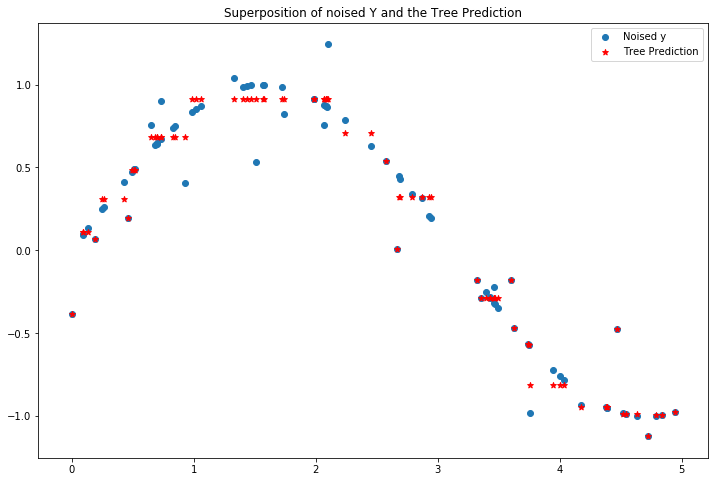

In [111]:
#We create a model with more noise
plt.figure(figsize=(12, 8)) 

rng = np.random.RandomState(1) 
X = np.sort(5 * rng.rand(80, 1), axis=0) 
y = np.sin(X).ravel() 
y[::4] += 1 * (0.5 - rng.rand(20))
plt.scatter(X,y,label = "Noised y")

tree = DecisionTreeRegressor(max_depth=5) 
tree.fit(X, y) 
y_tree = tree.predict(X)
plt.scatter(X,y_tree,label = "Tree Prediction", c='r',marker='*')

plt.title("Superposition of noised Y and the Tree Prediction") 
plt.legend(loc=1, numpoints=1) 
plt.show()



In this second case, our Decision Trees have a smaller depth, and are more independent of the input data. They are less 

sensitive to the noisy points. The compromise is that the Regressor performs less well on average.

# 5 - Random Sub-Sampling

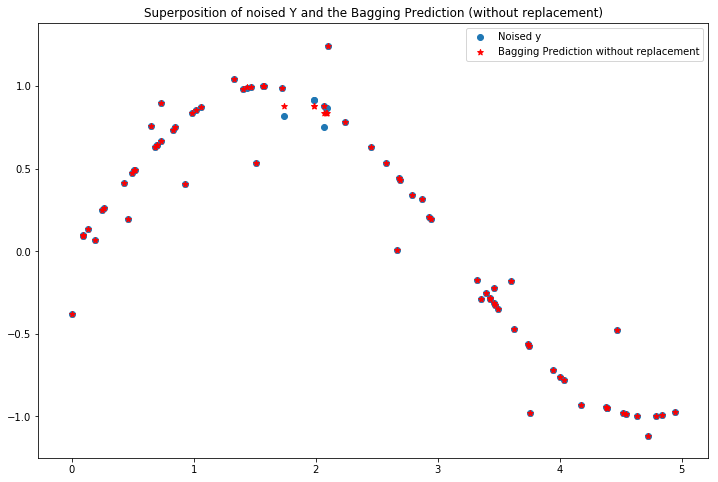

In [112]:
plt.figure(figsize=(12, 8)) 

rng = np.random.RandomState(1) 
X = np.sort(5 * rng.rand(80, 1), axis=0) 
y = np.sin(X).ravel() 
y[::4] += 1 * (0.5 - rng.rand(20))
plt.scatter(X,y,label = "Noised y")


tree = DecisionTreeRegressor(max_depth=10) 
tree.fit(X, y) 
bagging = BaggingRegressor(base_estimator=tree,n_estimators=n_estimators,bootstrap=False) 
bagging.fit(X, y) 

plt.scatter(X,bagging.predict(X),label = "Bagging Prediction without replacement", c='r',marker='*')

plt.title("Superposition of noised Y and the Bagging Prediction (without replacement)") 
plt.legend(loc=1, numpoints=1) 
plt.show()



# 6 - Evaluate Random Forest Scores

In [113]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC

Boston Dataset

In [114]:
#Boston data set train test - Regression
from sklearn.datasets import load_boston
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data,boston.target,test_size = 0.2)
clf = RandomForestRegressor().fit(X_train,y_train)
print('Random Forest with 7-fold cross validation on the Boston data set yields a score of : '+str(np.mean(cross_val_score(clf,X_test,y_test,cv=7))))

Random Forest with 7-fold cross validation on the Boston data set yields a score of : 0.719813071733147


Diabetes Dataset

In [115]:
#Diabetes data set train test - Regression
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target,test_size = 0.2)
clf = RandomForestRegressor().fit(X_train,y_train)
print('Random Forest with 7-fold cross validation on the Diabetes data set yields a score of : '+str(np.mean(cross_val_score(clf,X_test,y_test,cv=7))))

Random Forest with 7-fold cross validation on the Diabetes data set yields a score of : 0.4514083015803903


Iris Dataset

In [116]:
#Iris data set train test - Classification
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size = 0.2)
clf = RandomForestClassifier().fit(X_train,y_train)
print('Random Forest with 7-fold cross validation on the Iris data set yields a score of : '+str(np.mean(cross_val_score(clf,X_test,y_test,cv=7))))

#linear SVM
clf = LinearSVC()
clf.fit(X_train,y_train)
print('Linear SVM on the Iris data set yields a score of : '+str(clf.score(X_test,y_test)))

Random Forest with 7-fold cross validation on the Iris data set yields a score of : 0.9642857142857143
Linear SVM on the Iris data set yields a score of : 0.9333333333333333


Digits Dataset

In [117]:
#Digits data set train test - Classification
from sklearn.datasets import load_digits
digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size = 0.2)
clf = RandomForestClassifier().fit(X_train,y_train)
print('Random Forest with 7-fold cross validation on the Digits data set yields a score of : '+str(np.mean(cross_val_score(clf,X_test,y_test,cv=7))))

#linear SVM
clf = LinearSVC()
clf.fit(X_train,y_train)
print('Linear SVM on the Digits data set yields a score of : '+str(clf.score(X_test,y_test)))

Random Forest with 7-fold cross validation on the Digits data set yields a score of : 0.8909734852769514
Linear SVM on the Digits data set yields a score of : 0.9611111111111111


# 7 - Prediction probabilities

<Figure size 864x576 with 0 Axes>

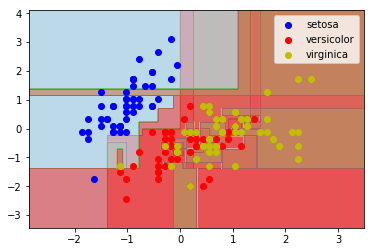

In [118]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.datasets import load_iris 
from sklearn.ensemble import RandomForestClassifier 

plt.figure(figsize=(12, 8)) 

# Parameters 
n_estimators = 2 
plot_colors = "bry" 
plot_step = 0.02 

# Load data 
iris = load_iris() 
X_unscaled, y = iris.data[:, :2], iris.target 

# Standardize 
X = preprocessing.scale(X_unscaled) 
# RF fitting 
model = RandomForestClassifier(n_estimators=n_estimators) 
clf = model.fit(X, y) 

# Plot the decision boundary 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.figure() 
for tree in model.estimators_: 
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])   
    
    Z = Z.reshape(xx.shape) 
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired) 
plt.axis("tight") 
# Plot the training points 
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i) 
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=plt.cm.Paired) 
plt.legend(scatterpoints=1) 
plt.show()


# 8 - Random Forests vs. Pure Decision Trees

In [119]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2],iris.target,test_size = 0.2)
clf = RandomForestClassifier().fit(X_train,y_train)
score = np.mean(cross_val_score(clf,X_test,y_test,cv=6))
print('Random Forest with 6-fold cross validation on the Iris data set yields a score of : '+str(score))

Random Forest with 6-fold cross validation on the Iris data set yields a score of : 0.8333333333333334


<Figure size 864x576 with 0 Axes>

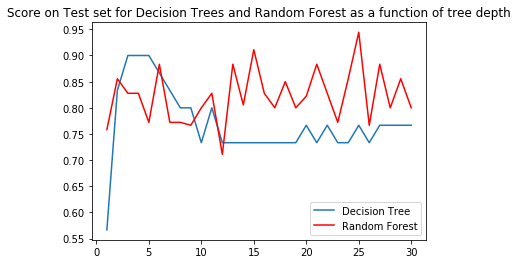

In [120]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(12, 8)) 

n_estimators = 10 # L in the text 
tree_max_depth_list = [i for i in range(1,31)] 
forest_score_list = []
tree_score_list = []

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2],iris.target,test_size = 0.2)
for i in range(30):
    
    clf = RandomForestClassifier(max_depth=tree_max_depth_list[i]).fit(X_train,y_train)
    forest_score_list.append(np.mean(cross_val_score(clf,X_test,y_test,cv=6)))
    
    tree = DecisionTreeClassifier(max_depth=tree_max_depth_list[i]) 
    tree.fit(X_train, y_train) 

    # Predict 
    tree_score_list.append(tree.score(X_test,y_test))
    
plt.figure()
plt.plot([i for i in range(1,31)] ,tree_score_list, label = 'Decision Tree')
plt.plot([i for i in range(1,31)],forest_score_list, c='r',label = 'Random Forest')
plt.title('Score on Test set for Decision Trees and Random Forest as a function of tree depth')
plt.legend()
plt.show()

We observe that both the Decision Tree and Random Forest yield good results on a previously unseen test set. This indicates that there is little overfitting with these models.

# 9 - Extra Random Trees vs 5-fold Random Forest

Iris Dataset

In [121]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2],iris.target,test_size = 0.2)
tree = ExtraTreesClassifier()
tree.fit(X_train,y_train)
print('Extra trees on the Iris data set yields a score of : '+str(tree.score(X_test,y_test)))

clf = RandomForestClassifier().fit(X_train,y_train)
print('Random Forest with 5-fold cross validation on the Iris data set yields a score of : '+str(np.mean(cross_val_score(clf,X_test,y_test,cv=5))))


Extra trees on the Iris data set yields a score of : 0.6
Random Forest with 5-fold cross validation on the Iris data set yields a score of : 0.6799999999999999


Boston Dataset

In [122]:
X_train, X_test, y_train, y_test = train_test_split(boston.data,boston.target,test_size = 0.2)
tree = ExtraTreesRegressor()
tree.fit(X_train,y_train)
print('Extra trees on the Boston data set yields a score of : '+str(tree.score(X_test,y_test)))

clf = RandomForestRegressor().fit(X_train,y_train)
print('Random Forest with 5-fold cross validation on the Boston data set yields a score of : '+str(np.mean(cross_val_score(clf,X_test,y_test,cv=5))))


Extra trees on the Boston data set yields a score of : 0.8817109534755273
Random Forest with 5-fold cross validation on the Boston data set yields a score of : 0.6980302301579837


# 10 - Feature Importance

In [123]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size = 0.2)
tree = ExtraTreesClassifier()
tree.fit(X_train,y_train)
tree_features = tree.feature_importances_

clf = RandomForestClassifier().fit(X_train,y_train)
forest_features = clf.feature_importances_

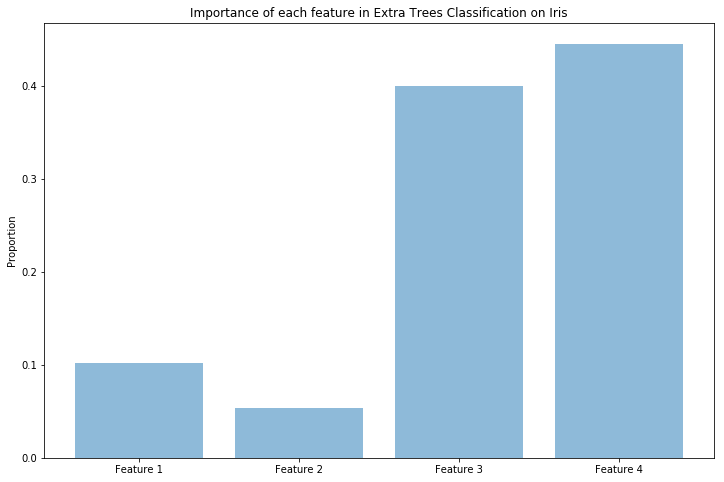

In [124]:
plt.figure(figsize=(12, 8)) 

objects = ('Feature 1', 'Feature 2', 'Feature 3', 'Feature 4')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, tree_features, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Proportion')
plt.title('Importance of each feature in Extra Trees Classification on Iris')
 
plt.show()

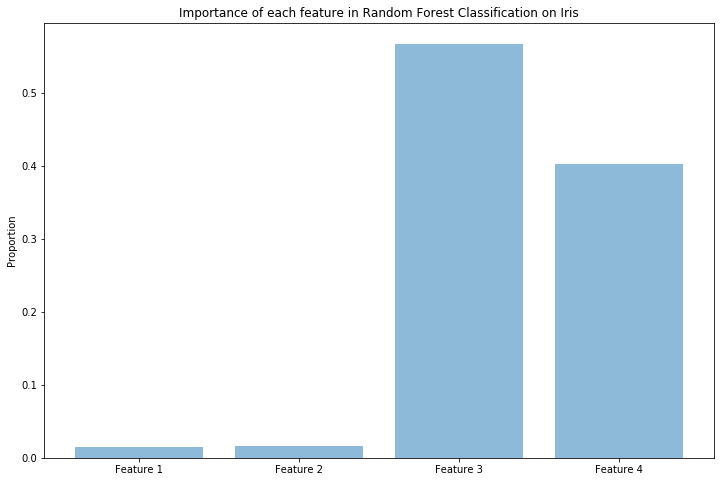

In [125]:
plt.figure(figsize=(12, 8)) 

objects = ('Feature 1', 'Feature 2', 'Feature 3', 'Feature 4')
y_pos = np.arange(len(objects))
 
plt.bar(y_pos, forest_features, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Proportion')
plt.title('Importance of each feature in Random Forest Classification on Iris')
 
plt.show()